# Code to rotate a grid points

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('grid2x1km.csv')
df.head()

,x,y,z,xrot,yrot
0,497000,206000,2500,497326.9194,202525.3617
1,497000,206000,1500,497326.9194,202525.3617
2,497000,206000,500,497326.9194,202525.3617
3,497000,206000,-500,497326.9194,202525.3617
4,497000,206000,-1500,497326.9194,202525.3617


In [24]:
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['z'])
print(len(x))

2430


# Grid visualization

In [25]:
from mpl_toolkits import mplot3d

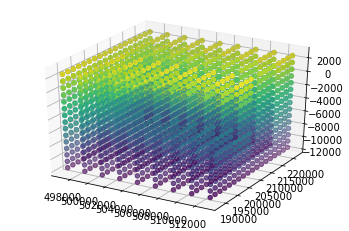

In [26]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x,y,z, c=z,cmap="Greens")
ax.scatter3D(x,y,z, c=z)

In [27]:
import math
import numpy as np

def rotate2d(x, y, teta, origin=(505000,205000)):
    offset_x, offset_y = origin
    adj_x = (x - offset_x)
    adj_y = (y - offset_y)
    cos_rad = math.cos(math.radians(teta))
    sin_rad = math.sin(math.radians(teta))
    qx = offset_x + cos_rad * adj_x + sin_rad * adj_y
    qy = offset_y + -sin_rad * adj_x + cos_rad * adj_y
    
    return qx,qy

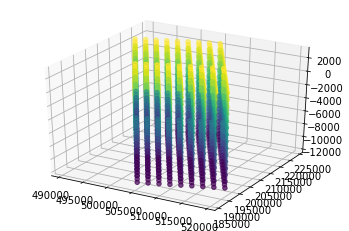

In [28]:
xn, yn = rotate2d(x, y, -25)

%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

# ax.scatter3D(xn,yn,z, c=z,cmap="Greens")
ax.scatter3D(xn,yn,z, c=z)

# Write to csv

In [29]:
data = {'x rot':xn,'y rot':yn, 'z':z}
koordinat = pd.DataFrame(data, columns =['x rot','y rot','z'])
koordinat.to_csv('grid2x1kmrot.csv',index=False)